In [15]:
import torch
from torch import nn
import os
device = "cuda" if torch.cuda.is_available() else "cpu"

In [16]:
def walkdir(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
image_path = "../dataset/"
walkdir(image_path)

There are 2 directories and 0 files in ../dataset/
There are 1 directories and 0 files in ../dataset/test_set
There are 2 directories and 0 files in ../dataset/test_set\test_set
There are 0 directories and 1012 files in ../dataset/test_set\test_set\cats
There are 0 directories and 1013 files in ../dataset/test_set\test_set\dogs
There are 1 directories and 0 files in ../dataset/training_set
There are 2 directories and 0 files in ../dataset/training_set\training_set
There are 0 directories and 4001 files in ../dataset/training_set\training_set\cats
There are 0 directories and 4006 files in ../dataset/training_set\training_set\dogs


In [17]:
test_dir = "../dataset/test_set/test_set"
train_dir = "../dataset/training_set/training_set"
train_dir,test_dir

('../dataset/training_set/training_set', '../dataset/test_set/test_set')

In [18]:
import random
from PIL import Image
import glob
from pathlib import Path

random.seed(42)

Image path: ../dataset\test_set\test_set\dogs\dog.4805.jpg
Image class: dogs
image height: 499, image width: 375


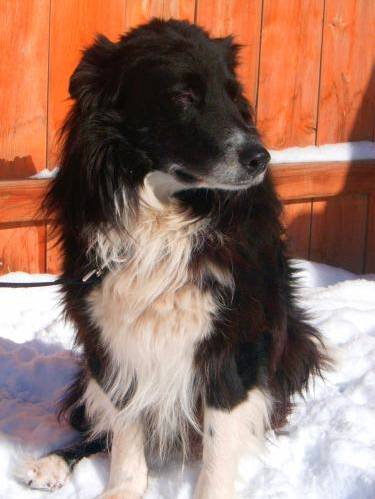

In [19]:
"""This snippet of code is used to randomly select an image from the dataset.
The class (parent directory) label is stored in the image_class variable. 
The image is then displayed using the PIL library.
The height and width of the image are also displayed."""
image_path_list = glob.glob(f"{image_path}/*/*/*/*.jpg")
random_image_path = random.choice(image_path_list)
image_class = Path(random_image_path).parent.stem
img = Image.open(random_image_path)

print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"image height: {img.height}, image width: {img.width}")
img

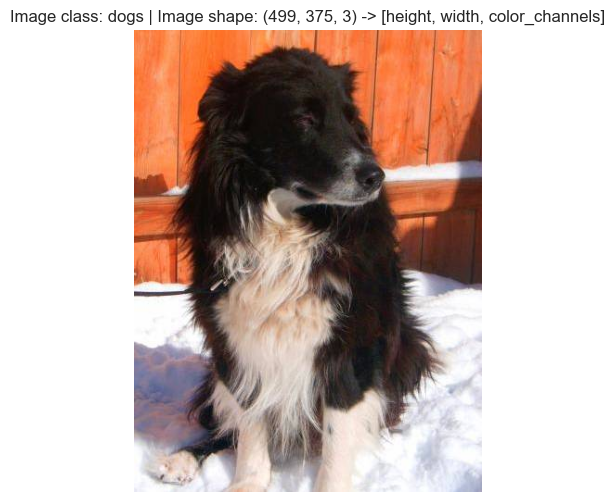

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
arrayfied_image =  np.array(img)
plt.figure(figsize=(8,6))
plt.imshow(arrayfied_image)
plt.title(f"Image class: {image_class} | Image shape: {arrayfied_image.shape} -> [height, width, color_channels]")
plt.axis(False);

In [21]:
#Data transformation/preprocessing 
from torch.utils.data import DataLoader #helps load datasets efficiently
from torchvision import datasets, transforms #provides access to common datasets and transformations
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

data_transform = transforms.Compose([
    transforms.Resize(size = IMAGE_SIZE),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor() #makes all RGB values between 0 and 1 and also optimizes the array for DL
])


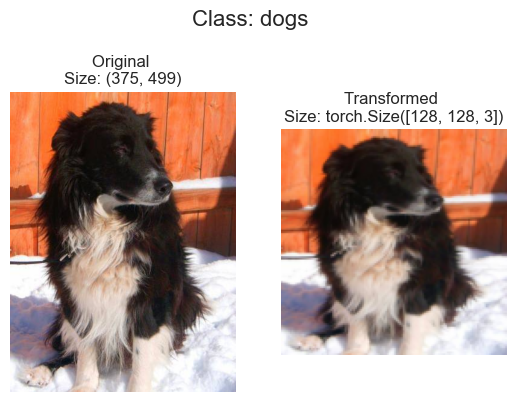

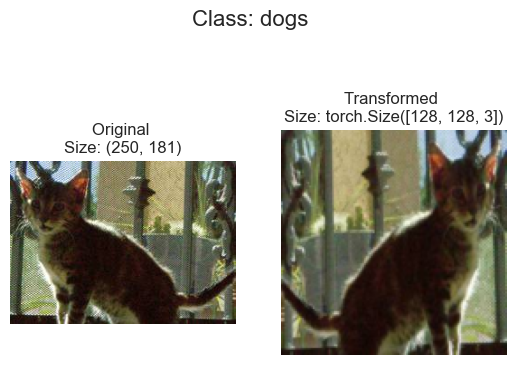

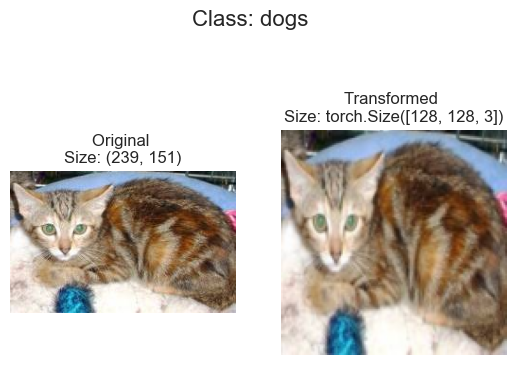

In [22]:
def plot_transformed_images(image_paths,transform,n = 3, seed = 42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths,k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")

            ax[1].axis("off")
            
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)
plot_transformed_images(image_path_list,data_transform,n = 3, seed = 42)

In [23]:
train_data = datasets.ImageFolder(root = train_dir, transform= data_transform, 
                                  target_transform= None)
test_data = datasets.ImageFolder(root = test_dir, transform= data_transform,
                                  target_transform= None)
#Preprocessing the entire dataset

In [24]:
class_names = train_data.classes
class_names
img, label = train_data[10][0], train_data[10][1]
#the ImageFolder contains a tuple of (image, label) of the entire dataset

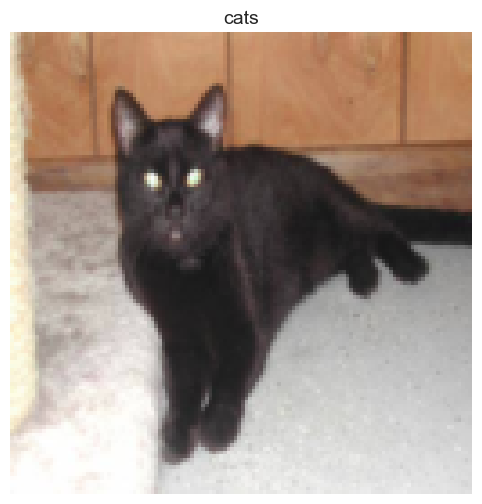

In [25]:
plt.figure(figsize = (8,6))
plt.imshow(img.permute(1,2,0))
plt.axis("off");
plt.title(class_names[label],fontsize = 14);

In [ ]:
NUM_WORKERS = os.cpu_count()
#The dataloader allow us to load the dataset in batches
train_dataloader = DataLoader(train_data, batch_size = 1, num_workers = NUM_WORKERS, shuffle = True)
trest_dataloader = DataLoader(test_data, batch_size = 1, num_workers = NUM_WORKERS, shuffle = False)


In [30]:
img,label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [Batch size, color channels, height, width] | Label: {image_class[label]}")
print(f"label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [Batch size, color channels, height, width] | Label: o
label shape: torch.Size([1])


In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
#Data augmentation - to increase the size of the dataset by applying random transformations to some of the imges
train_transform = transforms.Compose([
    transforms.Resize(size = IMAGE_SIZE),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()]
) #No data augmentation


In [35]:
train_data_augmented  = datasets.ImageFolder(train_dir,transform=train_transform)
test_data_augmented  = datasets.ImageFolder(test_dir,transform=test_transform)
BATCH_SIZE = 32
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, batch_size=BATCH_SIZE,shuffle=True,num_workers=NUM_WORKERS)
test_dataloader_augmented = DataLoader(test_data_augmented, batch_size=BATCH_SIZE,shuffle=False,num_workers=NUM_WORKERS)
